In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sentimentdataset.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
print("Mean Likes:", df['Likes'].mean())

Mean Likes: 42.90163934426229


In [6]:
print("Median Likes:", df['Likes'].median())

Median Likes: 43.0


In [7]:
print("Mode Sentiment:", df['Sentiment'].mode()[0])

Mode Sentiment:  Positive  


In [8]:
print("Likes Standard Deviation:", df['Likes'].std())

Likes Standard Deviation: 14.089848390888744


In [9]:
df['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [10]:
#We need to clean the sentiments and categorize as positive,negetive,neutral

In [11]:
#clean whitespace and capitalisation
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

In [12]:
#Now categorize and map them as positive ,negetive,neutral


In [13]:
# Define lists of grouped sentiments
positive_sentiments = ['positive', 'joy', 'happiness', 'love', 'amusement', 'hope', 'admiration', 
                       'gratitude', 'contentment', 'enthusiasm', 'excitement', 'euphoria', 'pride', 
                       'confidence', 'inspiration', 'fun', 'satisfaction', 'affection', 'serenity',
                       'playful', 'blessed', 'elation', 'wonder', 'radiance']

negative_sentiments = ['negative', 'anger', 'fear', 'sadness', 'disgust', 'despair', 'grief', 
                       'jealousy', 'resentment', 'frustration', 'boredom', 'anxiety', 'regret', 
                       'loneliness', 'heartbreak', 'hate', 'bad', 'sorrow', 'betrayal', 'suffering', 
                       'pain', 'cry', 'helplessness', 'shame', 'disappointment', 'darkness']

neutral_sentiments = ['neutral', 'calmness', 'confusion', 'acceptance', 'indifference', 'reflection']


In [14]:
# Map sentiments to main categories
def map_sentiment(Sentiment):
    if Sentiment in positive_sentiments:
        return 'positive'
    elif Sentiment in negative_sentiments:
        return 'negative'
    elif Sentiment in neutral_sentiments:
        return 'neutral'
    else:
        return 'other'  # catch-unknowns for now

df['Sentiment_grouped'] = df['Sentiment'].apply(map_sentiment)

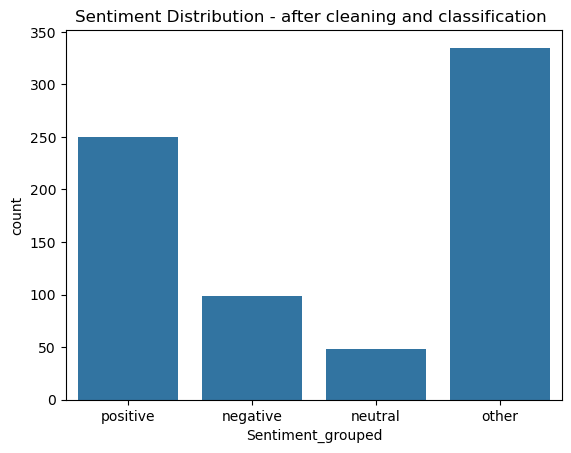

In [15]:
sns.countplot(x='Sentiment_grouped', data=df)
plt.title('Sentiment Distribution - after cleaning and classification ')
plt.show()

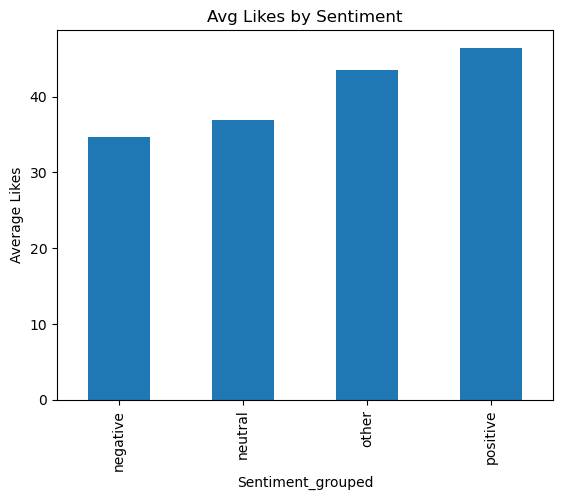

In [16]:
df.groupby('Sentiment_grouped')['Likes'].mean().plot(kind='bar', title='Avg Likes by Sentiment')
plt.ylabel('Average Likes')
plt.show()

In [17]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment_grouped
0,0,0,Enjoying a beautiful day at the park! ...,positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive
1,1,1,Traffic was terrible this morning. ...,negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative
2,2,2,Just finished an amazing workout! 💪 ...,positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive
3,3,3,Excited about the upcoming weekend getaway! ...,positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive
4,4,4,Trying out a new recipe for dinner tonight. ...,neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral


In [18]:
#Five Point Summary
summary = df[['Likes', 'Retweets']].describe()
for column in ['Retweets','Likes']:
    print(f"\n Five Point Summary for {column}:");
    print("Minimum:",summary.loc['min',column])
    print("Q1 (25%):", summary.loc['25%', column])
    print("Median (Q2):", summary.loc['50%', column])
    print("Q3 (75%):", summary.loc['75%', column])
    print("Maximum:", summary.loc['max', column])



 Five Point Summary for Retweets:
Minimum: 5.0
Q1 (25%): 17.75
Median (Q2): 22.0
Q3 (75%): 25.0
Maximum: 40.0

 Five Point Summary for Likes:
Minimum: 10.0
Q1 (25%): 34.75
Median (Q2): 43.0
Q3 (75%): 50.0
Maximum: 80.0


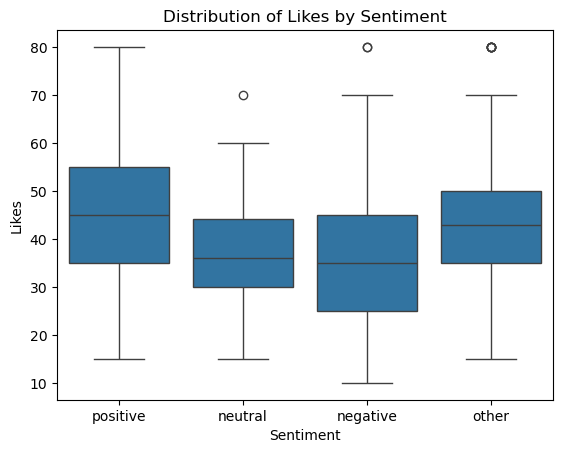

In [19]:
sns.boxplot(x='Sentiment_grouped', y='Likes', data=df, order=['positive', 'neutral', 'negative', 'other'])
plt.title("Distribution of Likes by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Likes")
plt.show()

In [20]:
print("Variance of Likes:", df['Likes'].var())
print("Variance of Retweets:", df['Retweets'].var())

Variance of Likes: 198.52382767823013
Variance of Retweets: 49.861765827184755


In [21]:
df.groupby('Sentiment_grouped')[['Likes', 'Retweets']].var()


,Likes,Retweets
Sentiment_grouped,,
negative,221.014430,55.772006
neutral,142.579787,36.932181
other,184.575959,46.145625
positive,173.790859,43.574683


Text(0.5, 1.0, 'Likes Distribution')

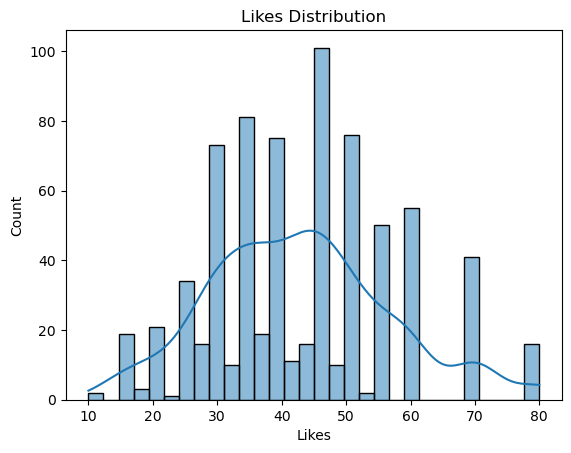

In [22]:
sns.histplot(df['Likes'],bins=30,kde=True)
plt.title("Likes Distribution")

Correlation: 0.9984821119176843


<Axes: xlabel='Likes', ylabel='Retweets'>

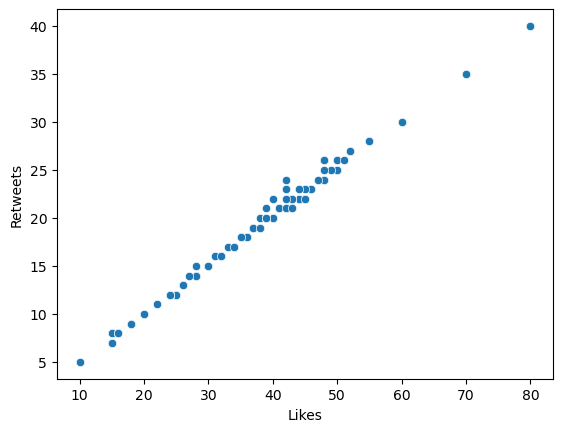

In [23]:
#check if there is a correlation between no of Likes and Retweets- How strongly two variables move together
print("Correlation:", df['Likes'].corr(df['Retweets']))
sns.scatterplot(x='Likes', y='Retweets', data=df)


In [24]:
#compare avg likes or retweets by sentiment
df.groupby('Sentiment_grouped')[['Likes','Retweets']].mean()

,Likes,Retweets
Sentiment_grouped,,
negative,34.616162,17.323232
neutral,36.875000,18.562500
other,43.564179,21.832836
positive,46.452000,23.296000


In [25]:
#Z-Score-Outlier Detection
from scipy.stats import zscore
df['Likes_z']=zscore(df['Likes'])
df['Likes_z'].abs().sort_values(ascending=False).head()


560    2.634785
520    2.634785
382    2.634785
470    2.634785
481    2.634785
Name: Likes_z, dtype: float64

<Axes: xlabel='Sentiment', ylabel='Likes'>

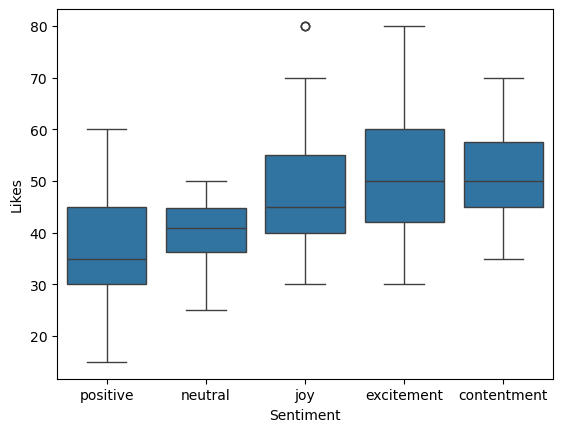

In [26]:
#box plot of likes vs individual sentiments
top5 = df['Sentiment'].value_counts().head(5).index
sns.boxplot(x='Sentiment', y='Likes', data=df[df['Sentiment'].isin(top5)])


In [27]:
#pivot table summary
df.pivot_table(values='Likes', index='Sentiment_grouped', aggfunc=['mean', 'median', 'std', 'var'])


,mean,median,std,var
,Likes,Likes,Likes,Likes
Sentiment_grouped,,,,
negative,34.616162,35.0,14.866554,221.014430
neutral,36.875000,36.0,11.940678,142.579787
other,43.564179,43.0,13.585873,184.575959
positive,46.452000,45.0,13.182976,173.790859


<Axes: xlabel='Timestamp'>

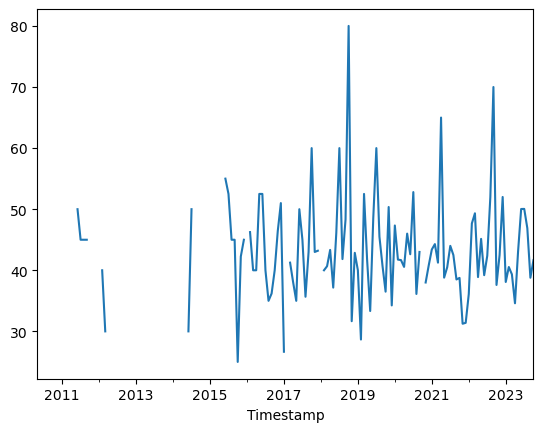

In [28]:
#Time based analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # adjust column name
df.set_index('Timestamp').resample('ME')['Likes'].mean().plot()


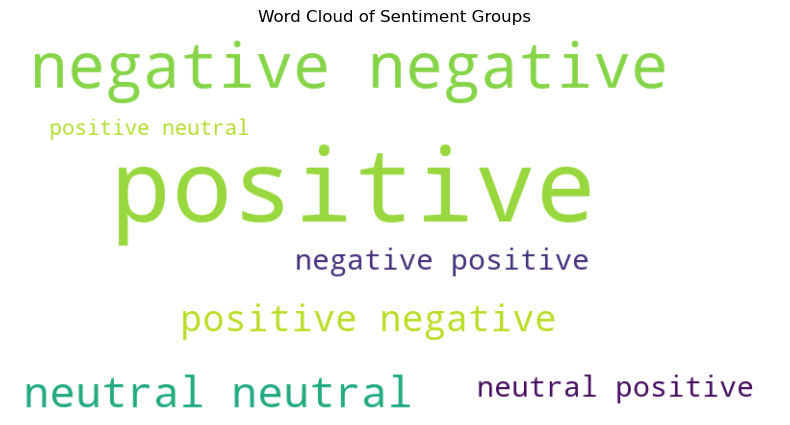

In [29]:
from wordcloud import WordCloud


# Combine all the text values in 'Sentiment_grouped' column
text = " ".join(df['Sentiment_grouped'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Sentiment Groups")
plt.show()


In [30]:
!pip install wordcloud


In [31]:
prob_dist = df['Sentiment'].value_counts(normalize=True)
print(prob_dist)

Sentiment
positive          0.061475
joy               0.060109
excitement        0.050546
contentment       0.025956
neutral           0.024590
                    ...   
lostlove          0.001366
emotionalstorm    0.001366
suffering         0.001366
bittersweet       0.001366
intrigue          0.001366
Name: proportion, Length: 191, dtype: float64


In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Country'], df['Sentiment'])

print("Contingency Table (Observed Frequencies):")
print(contingency_table)
print("\n" + "="*50 + "\n")

chi2_statistic, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("\n" + "="*50 + "\n")

alpha = 0.05

print("Interpretation:")
if p_value < alpha:
    print("The p-value is less than the significance level (alpha).")
    print("Therefore, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant association between country and sentiment.")
else:
    print("The p-value is greater than or equal to the significance level (alpha).")
    print("Therefore, we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant association between country and sentiment.")

Contingency Table (Observed Frequencies):
Sentiment            acceptance  accomplishment  admiration  adoration  \
Country                                                                  
 Australia                    1               0           0          0   
 Australia                    0               0           0          0   
 Australia                    0               0           0          0   
 Australia                    2               0           0          0   
 Australia                    1               0           0          0   
...                         ...             ...         ...        ...   
 USA                          0               0           0          0   
 USA                          0               0           0          0   
 USA                          0               0           0          0   
 USA                          0               0           1          0   
USA                           0               0           0          0

In [35]:
#Do the average number of Likes differ significantly across Sentiment categories? - ANOVA 1
#Do the average number of Likes differ across Platforms? - ANOVA 2
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ------------------------------
# 1. One-way ANOVA: Likes ~ Sentiment
# ------------------------------
groups_sentiment = [group["Likes"].values for name, group in df.groupby("Sentiment")]
f_stat_s, p_val_s = stats.f_oneway(*groups_sentiment)

print("One-way ANOVA (Likes by Sentiment) - SciPy")
print("F-statistic:", f_stat_s, "p-value:", p_val_s)

model_s = ols('Likes ~ C(Sentiment)', data=df).fit()
anova_sentiment = sm.stats.anova_lm(model_s, typ=2)
print("\nOne-way ANOVA (Likes by Sentiment) - Statsmodels")
print(anova_sentiment)

# ------------------------------
# 2. One-way ANOVA: Likes ~ Platform
# ------------------------------
groups_platform = [group["Likes"].values for name, group in df.groupby("Platform")]
f_stat_p, p_val_p = stats.f_oneway(*groups_platform)

print("\nOne-way ANOVA (Likes by Platform) - SciPy")
print("F-statistic:", f_stat_p, "p-value:", p_val_p)

model_p = ols('Likes ~ C(Platform)', data=df).fit()
anova_platform = sm.stats.anova_lm(model_p, typ=2)
print("\nOne-way ANOVA (Likes by Platform) - Statsmodels")
print(anova_platform)



One-way ANOVA (Likes by Sentiment) - SciPy
F-statistic: 3.5084825010000644 p-value: 3.9438757398849204e-30

One-way ANOVA (Likes by Sentiment) - Statsmodels
                    sum_sq     df         F        PR(>F)
C(Sentiment)  80107.952136  190.0  3.508483  3.943876e-30
Residual      65012.965897  541.0       NaN           NaN

One-way ANOVA (Likes by Platform) - SciPy
F-statistic: 10.23171462818689 p-value: 1.3236007679055554e-06

One-way ANOVA (Likes by Platform) - Statsmodels
                    sum_sq     df          F    PR(>F)
C(Platform)    5871.274511    3.0  10.231715  0.000001
Residual     139249.643522  728.0        NaN       NaN


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your loaded and cleaned DataFrame

# Check for and handle any missing values in the relevant columns
df.dropna(subset=['Sentiment', 'Platform', 'Likes'], inplace=True)

# Define the variables
X = df[['Sentiment', 'Platform']]
y = df['Likes']

# Preprocess the categorical data using a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sentiment', 'Platform'])
    ],
    remainder='passthrough'
)

# Create a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 160.78
R-squared (R²): 0.22


In [ ]:
#https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset- about dataset
#2 years older dataset